In [7]:
%matplotlib inline

import random
import torch
from d2l import torch as d2l


In [37]:
# 生成数据集
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1)) 

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


In [38]:
features[0], labels[0]

(tensor([-1.1255,  0.0267]), tensor([1.8442]))

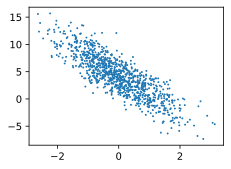

In [39]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
               labels.detach().numpy(), 1)

In [40]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y, sep='\n')
    break

tensor([[-0.6395,  1.3335],
        [-0.6683, -0.4583],
        [ 0.4125,  1.9817],
        [-0.3605,  1.1195],
        [-0.7918, -0.9730],
        [ 0.7690,  0.4762],
        [ 0.8834,  1.6370],
        [-1.1408,  0.0091],
        [ 0.3984, -0.0780],
        [ 1.4367, -0.0494]])
tensor([[-1.6227],
        [ 4.4215],
        [-1.6977],
        [-0.3241],
        [ 5.9332],
        [ 4.1235],
        [ 0.4150],
        [ 1.8650],
        [ 5.2651],
        [ 7.2623]])


In [41]:
torch.tensor([1,2,3,4,5,6,7,8,9])[torch.tensor([3,5,6])]

tensor([4, 6, 7])

In [42]:
# 构造模型
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
def linreg(X, w, b):
    """线性模型"""
    return torch.matmul(X, w) + b


In [43]:
# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [44]:
# 定义优化
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


In [52]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # l因为是小批次  所以是一个向量  不是一个标量  需要将其转化为标量
        l.sum().backward()
        sgd([w, b], lr, batch_size)
        
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss: {float(train_l.mean()):f}')

epoch 1, loss: 0.000051
epoch 2, loss: 0.000051
epoch 3, loss: 0.000051


In [53]:
true_b - b

tensor([0.0003], grad_fn=<RsubBackward1>)

In [54]:
true_w - w.reshape(true_w.shape)

tensor([-0.0012, -0.0001], grad_fn=<SubBackward0>)